Combined entropy plot saved as combined_entropy_plot.png


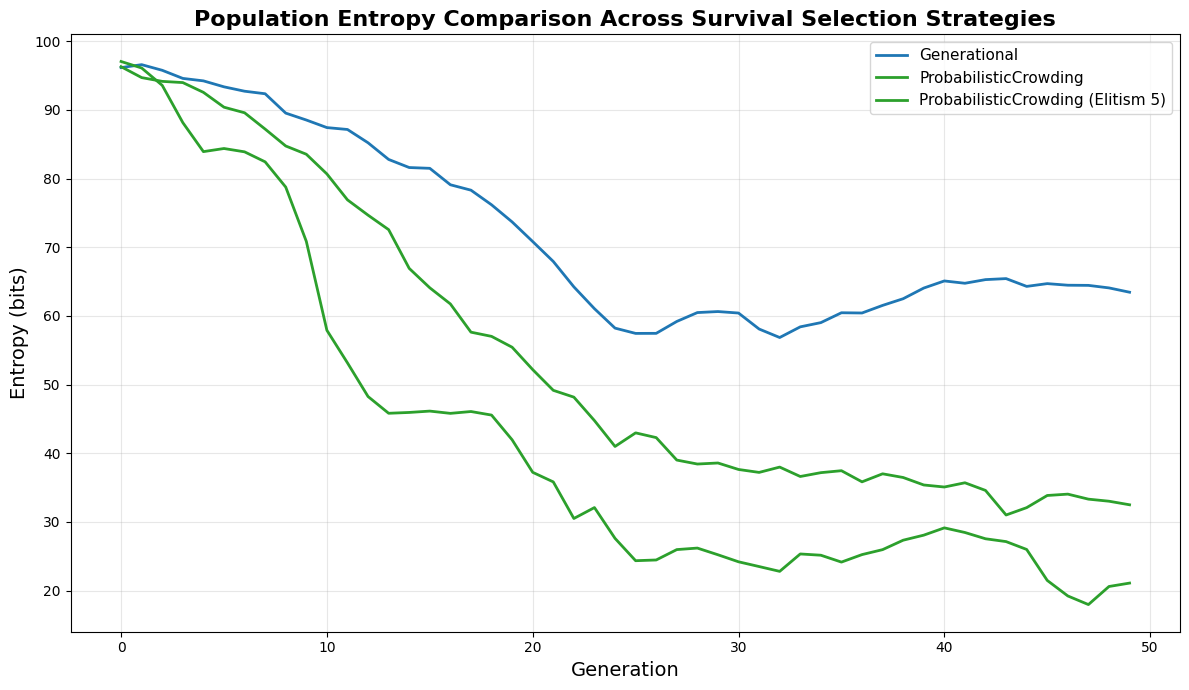

In [1]:
#!/usr/bin/env python3
"""
Plot combined entropy histories from multiple survival selection strategies.
"""
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def plot_combined_entropy():
    # Find all entropy CSV files
    csv_files = glob.glob("entropy_history_*.csv")
    
    if not csv_files:
        print("No entropy history CSV files found!")
        return
    
    # Create figure
    plt.figure(figsize=(12, 7))
    
    # Color map for different strategies
    colors = {
        'Generational': '#1f77b4',
        'DeterministicCrowding': '#ff7f0e',
        'ProbabilisticCrowding': '#2ca02c',
    }
    
    # Read and plot each CSV file
    for csv_file in sorted(csv_files):
        df = pd.read_csv(csv_file)
        
        # Extract strategy name from filename
        # Format: entropy_history_{Strategy}[_Elitism{N}].csv
        basename = os.path.basename(csv_file)
        strategy_part = basename.replace("entropy_history_", "").replace(".csv", "")
        
        # Check if elitism is used
        if "_Elitism" in strategy_part:
            strategy, elitism_part = strategy_part.split("_Elitism")
            label = f"{strategy} (Elitism {elitism_part})"
        else:
            strategy = strategy_part
            label = strategy
        
        # Get color for this strategy, default to gray if not in map
        color = colors.get(strategy, '#7f7f7f')
        
        # Plot
        plt.plot(df['generation'], df['entropy'], 
                label=label, linewidth=2, color=color)
    
    # Customize plot
    plt.xlabel('Generation', fontsize=14)
    plt.ylabel('Entropy (bits)', fontsize=14)
    plt.title('Population Entropy Comparison Across Survival Selection Strategies', 
              fontsize=16, fontweight='bold')
    plt.legend(loc='best', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Save plot
    output_file = 'combined_entropy_plot.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Combined entropy plot saved as {output_file}")
    
    # Show plot
    plt.show()

if __name__ == "__main__":
    plot_combined_entropy()
